In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import gray2rgb
from sklearn.model_selection import KFold

sys.path.insert(0, './lib/')
from help_functions import *

In [2]:
dice_res = pd.DataFrame()
for i in range(5):
    dice = pd.read_csv("DISC_segmentation/cv_reduced_segmenter2_adam10/all_dice_cv" + str(i+1) + ".csv")
    dice_res = pd.concat([dice_res, dice.iloc[:,5]])

In [3]:
dice_res.sort([0])

/home/sh402/retina-unet/rop_env_cpu/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,0
6,0.000000
10,0.670951
1,0.782629
5,0.790541
15,0.792829
16,0.800632
2,0.803621
3,0.815274
10,0.822194
7,0.822785


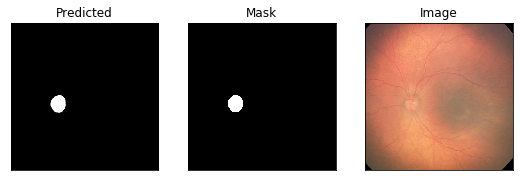

Pre-plus
DICE score:0.9638778839431368


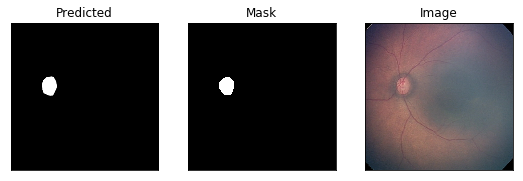

Normal
DICE score:0.9517241379310344


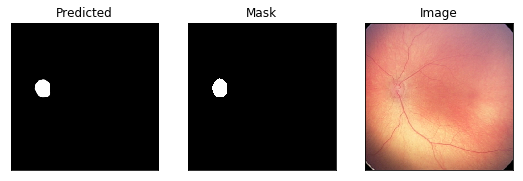

Normal
DICE score:0.9580583351075156


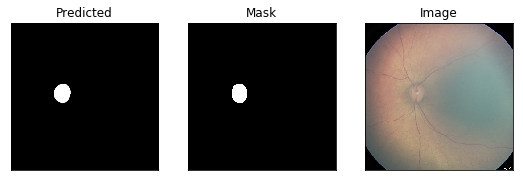

Normal
DICE score:0.9599074787972244


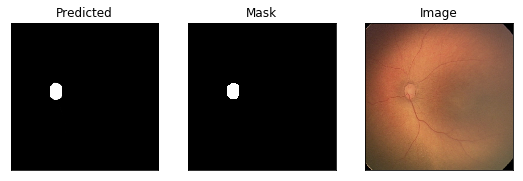

Normal
DICE score:0.960220994475138


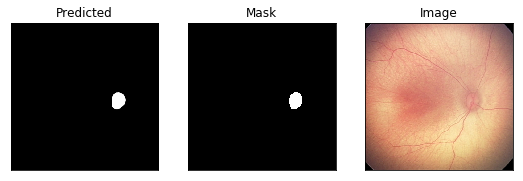

Normal
DICE score:0.9514159521953754


In [2]:
kf = KFold(n_splits=5, random_state=123, shuffle=True)
raw_img = load_hdf5("DISC/total_raw.hdf5")
img_all = np.moveaxis(raw_img,1,-1)
img = img_all[:,:,80:560,:]/255

mask_img = load_hdf5("DISC/total_mask.hdf5")
mask_all = np.squeeze(mask_img)
mask_all = gray2rgb(mask_all)
mask = mask_all[:,:,80:560,:]

cv = 1
for train_index, test_index in kf.split(raw_img):
    path = "DISC_segmentation/cv_reduced_segmenter2_adam10/cv_reduced_segmenter2_adam10_prediction_cv" + str(cv) + ".h5"
    pred = load_hdf5(path)
    pred = np.squeeze(pred) *255

    results = pd.read_csv("DISC_segmentation/cv_reduced_segmenter2_adam10/all_dice_cv" + str(cv) + ".csv")
    
    for i, index in enumerate(test_index):
        
        if results.iloc[i,5] > 0.95:
            fig = plt.figure(figsize=(9, 4))

            ax = fig.add_subplot(1, 3, 1)

            ax.imshow(pred[i], cmap=plt.cm.Greys_r)
            ax.set_title('Predicted')
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax = fig.add_subplot(1, 3, 2)

            ax.imshow(mask[index])
            ax.set_title('Mask')
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax = fig.add_subplot(1, 3, 3)
            #ax.imshow(img)

            ax.imshow(img[index])
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax.set_title('Image')
            plt.show()


            if index <= 51:
                print("Normal")
            elif index <= 77:
                print("Pre-plus")
            else:
                print("Plus")
            print("DICE score:" + str(results.iloc[i,5]))    
            
    cv += 1
    
    


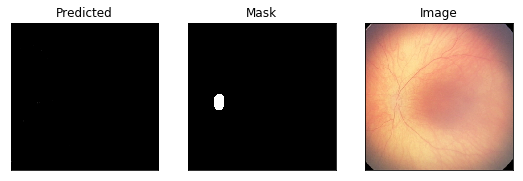

Normal
DICE score:0.0


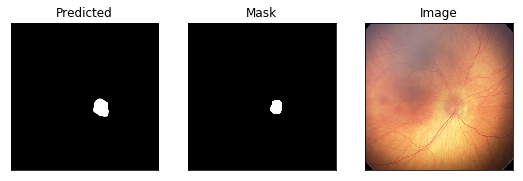

Normal
DICE score:0.7905405405405406


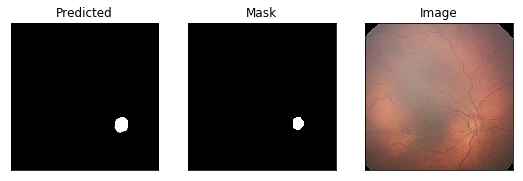

Plus
DICE score:0.7928286852589641


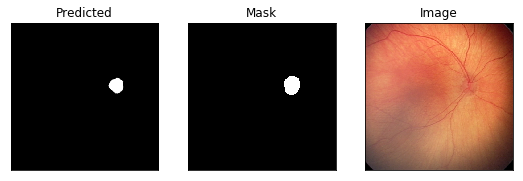

Normal
DICE score:0.7826288899210404


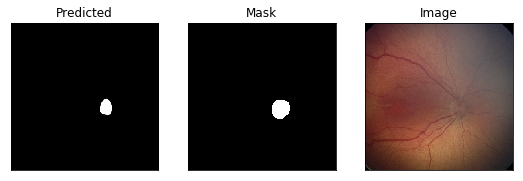

Pre-plus
DICE score:0.6709505871925548


In [6]:
kf = KFold(n_splits=5, random_state=123, shuffle=True)
raw_img = load_hdf5("DISC/total_raw.hdf5")
img_all = np.moveaxis(raw_img,1,-1)
img = img_all[:,:,80:560,:]/255

mask_img = load_hdf5("DISC/total_mask.hdf5")
mask_all = np.squeeze(mask_img)
mask_all = gray2rgb(mask_all)
mask = mask_all[:,:,80:560,:]

cv = 1
for train_index, test_index in kf.split(raw_img):
    path = "DISC_segmentation/cv_reduced_segmenter2_adam10/cv_reduced_segmenter2_adam10_prediction_cv" + str(cv) + ".h5"
    pred = load_hdf5(path)
    pred = np.squeeze(pred) *255

    results = pd.read_csv("DISC_segmentation/cv_reduced_segmenter2_adam10/all_dice_cv" + str(cv) + ".csv")
    
    for i, index in enumerate(test_index):
        
        if results.iloc[i,5] < 0.8:
            fig = plt.figure(figsize=(9, 4))

            ax = fig.add_subplot(1, 3, 1)

            ax.imshow(pred[i], cmap=plt.cm.Greys_r)
            ax.set_title('Predicted')
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax = fig.add_subplot(1, 3, 2)

            ax.imshow(mask[index])
            ax.set_title('Mask')
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax = fig.add_subplot(1, 3, 3)
            #ax.imshow(img)

            ax.imshow(img[index])
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax.set_title('Image')
            plt.show()


            if index <= 51:
                print("Normal")
            elif index <= 77:
                print("Pre-plus")
            else:
                print("Plus")
            print("DICE score:" + str(results.iloc[i,5]))    
            
    cv += 1
    
    


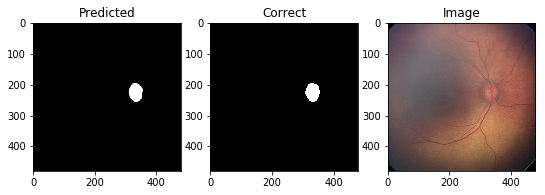

Normal
DICE score:0.9669117647058824


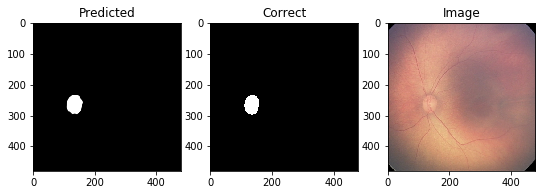

Normal
DICE score:0.9552780016116036


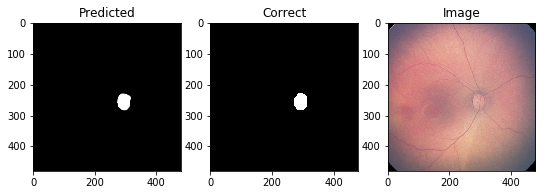

Normal
DICE score:0.9574356279558592


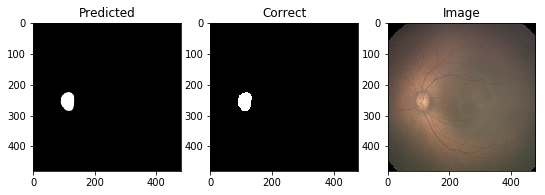

Normal
DICE score:0.9572490706319704


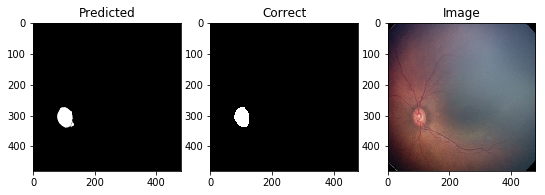

Pre-plus
DICE score:0.9535615899252264


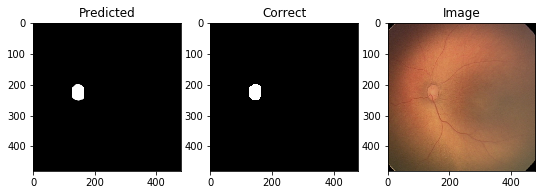

Normal
DICE score:0.9563758389261744


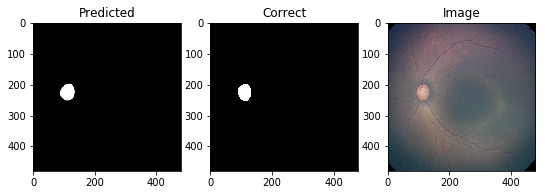

Normal
DICE score:0.9532614278376992


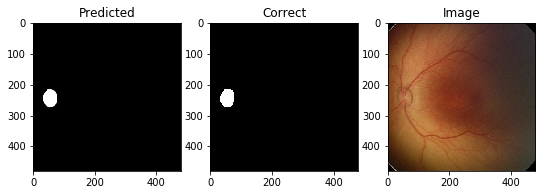

Pre-plus
DICE score:0.9557399723374828


In [7]:
kf = KFold(n_splits=5, random_state=123, shuffle=True)
raw_img = load_hdf5("DISC/total_raw.hdf5")
img_all = np.moveaxis(raw_img,1,-1)
img = img_all[:,:,80:560,:]/255

mask_img = load_hdf5("DISC/total_mask.hdf5")
mask_all = np.squeeze(mask_img)
mask_all = gray2rgb(mask_all)
mask = mask_all[:,:,80:560,:]

cv = 1
for train_index, test_index in kf.split(raw_img):
    
    path = "DISC_segmentation/cv_reduced_finalunet_adam10/cv_reduced_finalunet_adam10_prediction_cv" + str(cv) + ".h5"
    pred = load_hdf5(path)
    pred = np.squeeze(pred) *255

    results = pd.read_csv("DISC_segmentation/cv_reduced_finalunet_adam10/all_dice_cv" + str(cv) + ".csv")
    
    for i, index in enumerate(test_index):
        
        if results.iloc[i,5] > 0.95:
            
            fig = plt.figure(figsize=(9, 4))
            ax.format_coord = lambda x, y: ''
            ax = fig.add_subplot(1, 3, 1)

            ax.imshow(pred[i], cmap=plt.cm.Greys_r)
            ax.set_title('Predicted')
            ax = fig.add_subplot(1, 3, 2)

            ax.imshow(mask[index])
            ax.set_title('Correct')
            ax = fig.add_subplot(1, 3, 3)
            #ax.imshow(img)

            ax.imshow(img[index])
            ax.set_title('Image')
            plt.show()

            if index <= 51:
                print("Normal")
            elif index <= 77:
                print("Pre-plus")
            else:
                print("Plus")

            print("DICE score:" + str(results.iloc[i,5]))  
    
    cv += 1
    
    


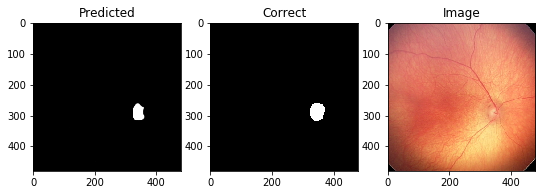

Normal
DICE score:0.7975238586535981


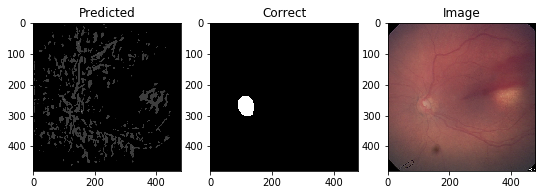

Pre-plus
DICE score:0.0


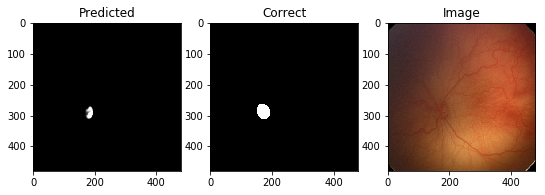

Plus
DICE score:0.4863195057369815


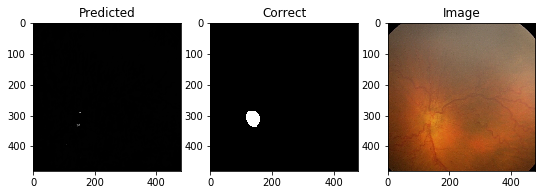

Plus
DICE score:0.0


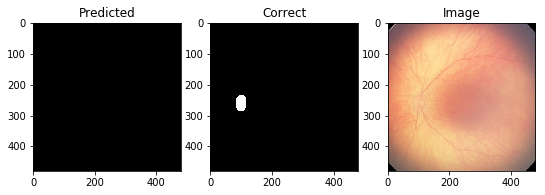

Normal
DICE score:0.0


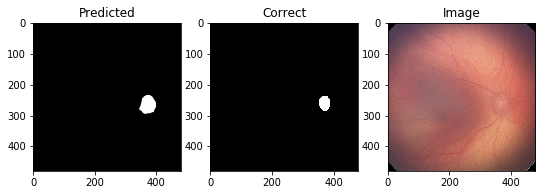

Normal
DICE score:0.7224692649751504


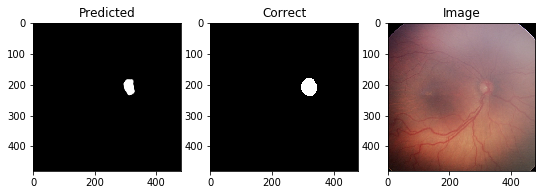

Pre-plus
DICE score:0.7018104366347178


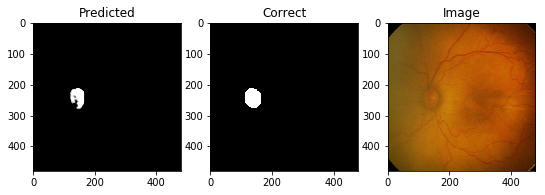

Plus
DICE score:0.7969624300559552


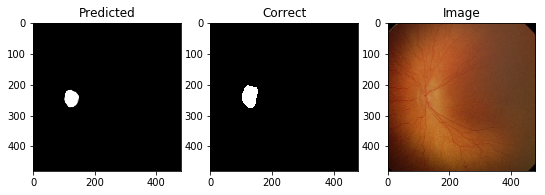

Pre-plus
DICE score:0.7681246255242661


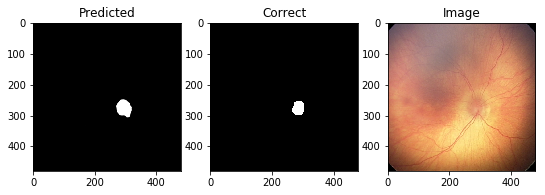

Normal
DICE score:0.7477648333784882


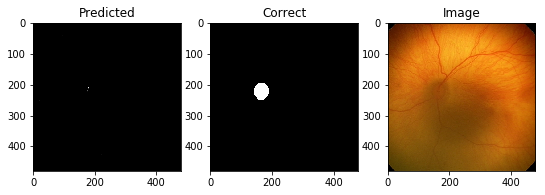

Normal
DICE score:0.0


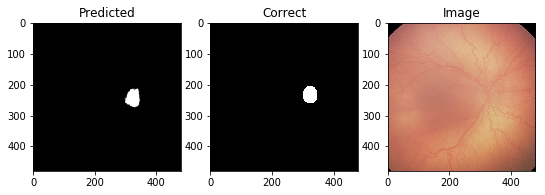

Plus
DICE score:0.7386444708680142


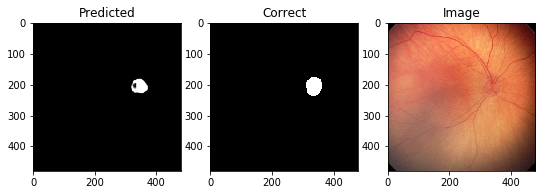

Normal
DICE score:0.6913809082483782


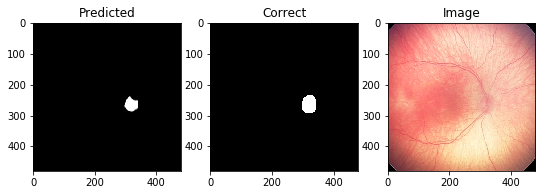

Normal
DICE score:0.7624511082138201


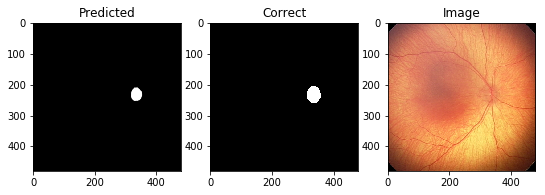

Normal
DICE score:0.7608015028177834


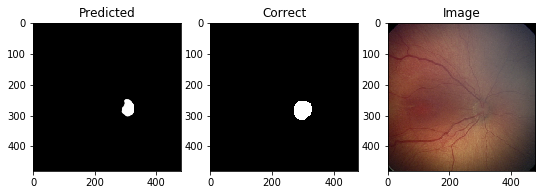

Pre-plus
DICE score:0.6665212649945474


In [8]:
kf = KFold(n_splits=5, random_state=123, shuffle=True)
raw_img = load_hdf5("DISC/total_raw.hdf5")
img_all = np.moveaxis(raw_img,1,-1)
img = img_all[:,:,80:560,:]/255

mask_img = load_hdf5("DISC/total_mask.hdf5")
mask_all = np.squeeze(mask_img)
mask_all = gray2rgb(mask_all)
mask = mask_all[:,:,80:560,:]

cv = 1
for train_index, test_index in kf.split(raw_img):
    
    path = "DISC_segmentation/cv_reduced_finalunet_adam10/cv_reduced_finalunet_adam10_prediction_cv" + str(cv) + ".h5"
    pred = load_hdf5(path)
    pred = np.squeeze(pred) *255

    results = pd.read_csv("DISC_segmentation/cv_reduced_finalunet_adam10/all_dice_cv" + str(cv) + ".csv")
    
    for i, index in enumerate(test_index):
        
        if results.iloc[i,5] < 0.8:
            
            fig = plt.figure(figsize=(9, 4))
            ax.format_coord = lambda x, y: ''
            ax = fig.add_subplot(1, 3, 1)

            ax.imshow(pred[i], cmap=plt.cm.Greys_r)
            ax.set_title('Predicted')
            ax = fig.add_subplot(1, 3, 2)

            ax.imshow(mask[index])
            ax.set_title('Correct')
            ax = fig.add_subplot(1, 3, 3)
            #ax.imshow(img)

            ax.imshow(img[index])
            ax.set_title('Image')
            plt.show()

            if index <= 51:
                print("Normal")
            elif index <= 77:
                print("Pre-plus")
            else:
                print("Plus")

            print("DICE score:" + str(results.iloc[i,5]))  
    
    cv += 1
    
    


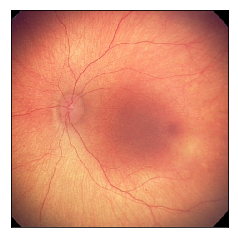

In [26]:
fig = plt.imshow(img[2])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

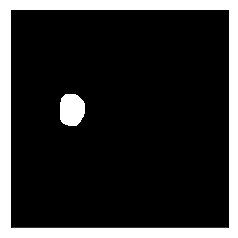

In [27]:
fig = plt.imshow(mask[2])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

In [38]:
center = get_center(mask)

In [39]:
center.shape

(92, 2)

In [43]:
mask.shape

(92, 480, 480, 3)

In [40]:
center

array([[166.40712074,   1.        ],
       [123.95512494,   1.        ],
       [133.49358974,   1.        ],
       [172.30370682,   1.        ],
       [305.53694581,   1.        ],
       [178.91284916,   1.        ],
       [116.28672986,   1.        ],
       [119.55159928,   1.        ],
       [332.42605951,   1.        ],
       [121.08347153,   1.        ],
       [145.47813742,   1.        ],
       [286.53780965,   1.        ],
       [284.53864734,   1.        ],
       [116.64      ,   1.        ],
       [305.94980185,   1.        ],
       [337.11215991,   1.        ],
       [157.67058824,   1.        ],
       [336.51886426,   1.        ],
       [108.431562  ,   1.        ],
       [113.11890661,   1.        ],
       [331.81589404,   1.        ],
       [304.65988181,   1.        ],
       [166.18723801,   1.        ],
       [125.12827225,   1.        ],
       [100.36002562,   1.        ],
       [321.30337553,   1.        ],
       [310.35320334,   1.        ],
 